In [1]:
#Necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model     import LinearRegression, Lasso, Ridge
from sklearn.model_selection  import cross_val_score, KFold
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import r2_score, mean_squared_error, mean_absolute_error
from sklearn                  import metrics
from sklearn.ensemble         import RandomForestRegressor
from sklearn.preprocessing    import LabelEncoder, StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv file
movie_data=pd.read_csv('movie_data.csv')

<font size="4">Exploratory Data Analysis</font>

In [3]:
movie_data=movie_data.drop(['Unnamed: 0'],axis=1)
movie_data.head()

,movie_title,release_date,domestic_gross,genres,budget,distributor,theaters,runtime(minutes),in_release(day),rating
0,Avatar 2010 Special Edition,2010-08-27,10741486,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",237000000.0,Twentieth Century Fox,812,162,133,PG-13
1,Toy Story 3,2010-06-18,415004880,"['Adventure', 'Animation', 'Comedy', 'Family',...",200000000.0,Walt Disney Studios Motion Pictures,4028,103,203,NaN
2,Alice in Wonderland,2010-03-05,334191110,"['Adventure', 'Family', 'Fantasy', 'Mystery']",200000000.0,Walt Disney Studios Motion Pictures,3739,108,302,PG
3,Iron Man 2,2010-05-07,312433331,"['Action', 'Adventure', 'Sci-Fi']",200000000.0,Paramount Pictures,4390,124,239,PG-13
4,The Twilight Saga: Eclipse,2010-06-30,300531751,"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",68000000.0,Summit Entertainment,4468,124,185,PG-13


In [4]:
movie_data.shape

(1803, 10)

In [5]:
#Check number of NaN values for each column
#movie_data.isna().sum()

In [6]:
#Get information about non-null values and the types of each column
#movie_data.info()

In [7]:
#Drop NaN values
movie_data=movie_data.dropna()
movie_data.shape

(1079, 10)

In [8]:
#Get column names
columns=movie_data.columns
columns

Index(['movie_title', 'release_date', 'domestic_gross', 'genres', 'budget',
       'distributor', 'theaters', 'runtime(minutes)', 'in_release(day)',
       'rating'],
      dtype='object')

In [9]:
movie_data=pd.get_dummies(movie_data,columns=['rating'],prefix='',prefix_sep='')
movie_data.head(2)

,movie_title,release_date,domestic_gross,genres,budget,distributor,theaters,runtime(minutes),in_release(day),G,PG,PG-13,R
0,Avatar 2010 Special Edition,2010-08-27,10741486,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",237000000.0,Twentieth Century Fox,812,162,133,0,0,1,0
2,Alice in Wonderland,2010-03-05,334191110,"['Adventure', 'Family', 'Fantasy', 'Mystery']",200000000.0,Walt Disney Studios Motion Pictures,3739,108,302,0,1,0,0


In [10]:
#Remove unnecessary features
movie_data=movie_data.drop(['release_date','movie_title','genres'],axis=1)

In [11]:
#Replace minutes and 2hr with 120
movie_data['runtime(minutes)']=movie_data['runtime(minutes)'].replace({"mins":"","2 hr":"120"})

In [12]:
#movie_data.info()

In [13]:
#Convert runtime(minutes) and in_release(day) columns from object to float and integer
movie_data['runtime(minutes)']=pd.to_numeric(movie_data['runtime(minutes)'],errors='coerce')
movie_data['in_release(day)']=pd.to_numeric(movie_data['in_release(day)'],errors='coerce')

In [14]:
#Check for NaN values after converting from object due to invalid parsing
#movie_data.isna().sum()

In [15]:
#Drop NaN value
movie_data=movie_data.dropna()
movie_data.head(2)

,domestic_gross,budget,distributor,theaters,runtime(minutes),in_release(day),G,PG,PG-13,R
0,10741486,237000000.0,Twentieth Century Fox,812,162.0,133,0,0,1,0
2,334191110,200000000.0,Walt Disney Studios Motion Pictures,3739,108.0,302,0,1,0,0


In [16]:
#Label encode to map the distributor name to an integer
movie_data['distributor']= LabelEncoder().fit_transform(movie_data['distributor'])
movie_data.head()

,domestic_gross,budget,distributor,theaters,runtime(minutes),in_release(day),G,PG,PG-13,R
0,10741486,237000000.0,46,812,162.0,133,0,0,1,0
2,334191110,200000000.0,50,3739,108.0,302,0,1,0,0
3,312433331,200000000.0,29,4390,124.0,239,0,0,1,0
4,300531751,68000000.0,42,4468,124.0,185,0,0,1,0
5,292576195,160000000.0,51,3792,148.0,534,0,0,1,0


In [17]:
movie_data.shape

(1078, 10)

In [18]:
#Save dataframe to csv 
movie_data.to_csv('final_movie_data.csv',index=False)

In [19]:
#Correlation of the columns
movie_data.corr()

,domestic_gross,budget,distributor,theaters,runtime(minutes),in_release(day),G,PG,PG-13,R
domestic_gross,1.000000,0.657249,0.243709,0.593669,0.344845,0.132199,0.073269,0.092219,0.140656,-0.230618
budget,0.657249,1.000000,0.258214,0.597741,0.426608,0.074232,0.093910,0.109786,0.234278,-0.344334
distributor,0.243709,0.258214,1.000000,0.324378,0.143793,0.072564,0.055820,0.090061,0.014945,-0.096846
theaters,0.593669,0.597741,0.324378,1.000000,0.169533,0.071825,0.069070,0.154923,0.122767,-0.262295
runtime(minutes),0.344845,0.426608,0.143793,0.169533,1.000000,0.100326,-0.062959,-0.248815,0.245194,-0.041254
in_release(day),0.132199,0.074232,0.072564,0.071825,0.100326,1.000000,0.023333,0.085202,0.025198,-0.098453
G,0.073269,0.093910,0.055820,0.069070,-0.062959,0.023333,1.000000,-0.035925,-0.066150,-0.057122
PG,0.092219,0.109786,0.090061,0.154923,-0.248815,0.085202,-0.035925,1.000000,-0.424597,-0.366645
PG-13,0.140656,0.234278,0.014945,0.122767,0.245194,0.025198,-0.066150,-0.424597,1.000000,-0.675110
R,-0.230618,-0.344334,-0.096846,-0.262295,-0.041254,-0.098453,-0.057122,-0.366645,-0.675110,1.000000


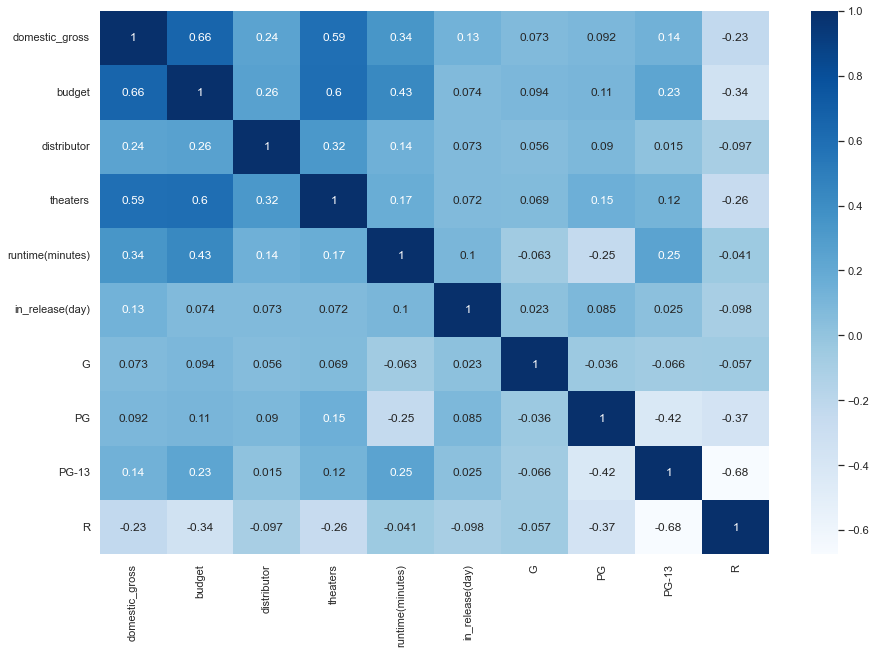

In [20]:
#See correlation in the data
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(movie_data.corr(),cmap='Blues',annot=True);
plt.savefig('heatmap')

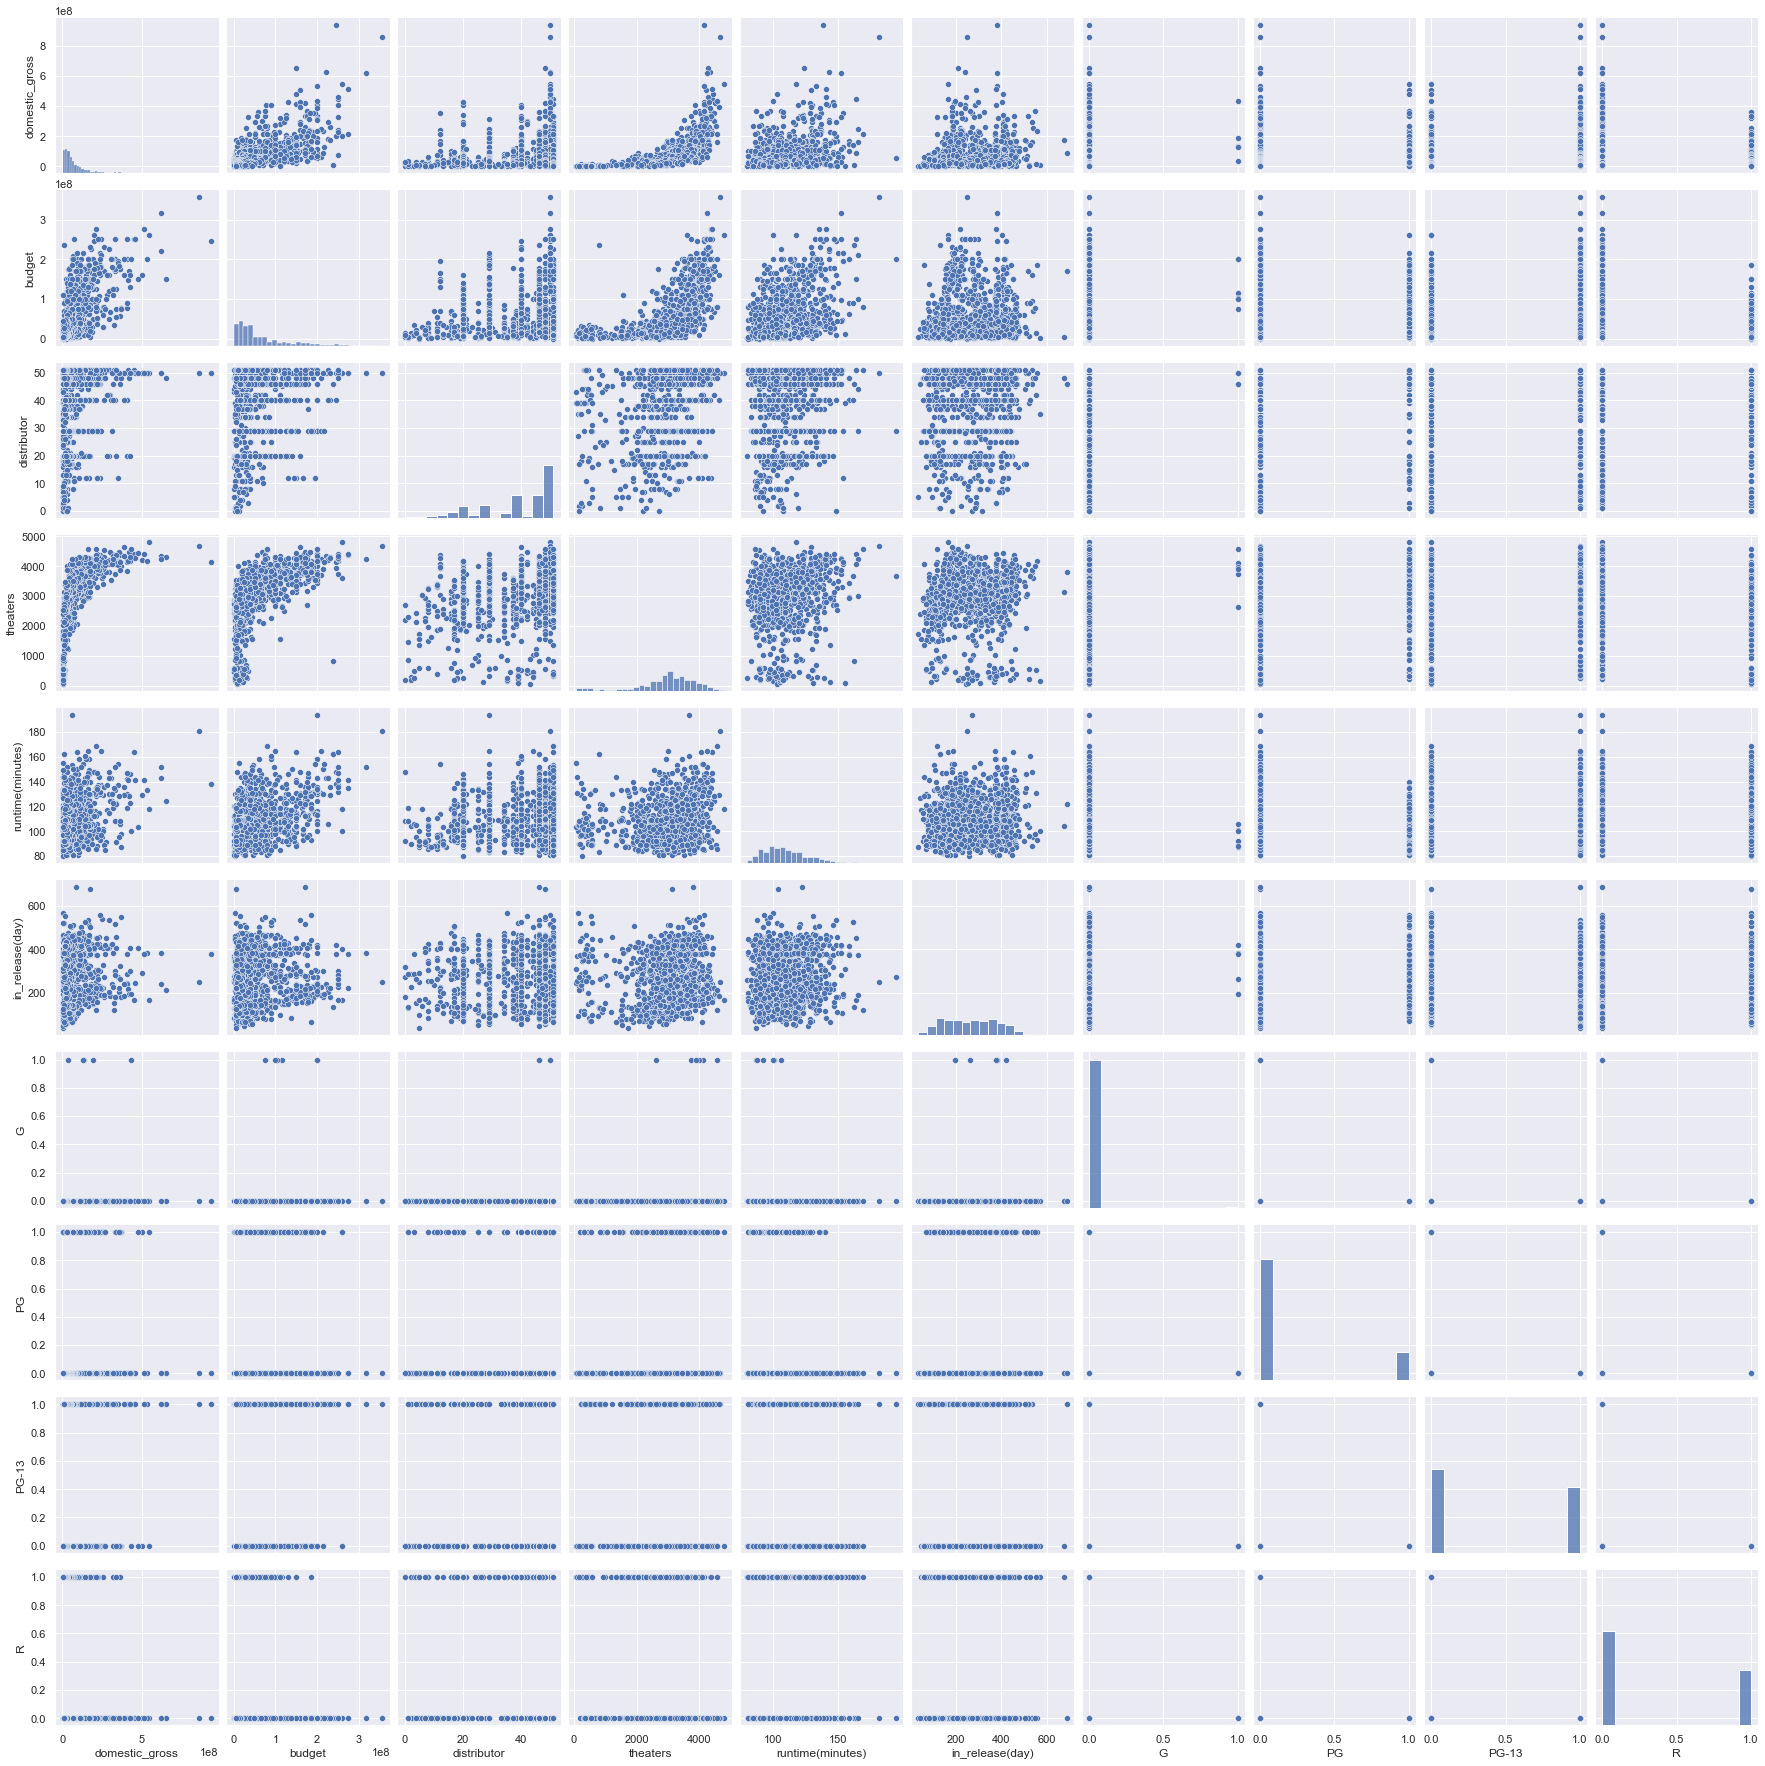

In [21]:
sns.pairplot(movie_data);

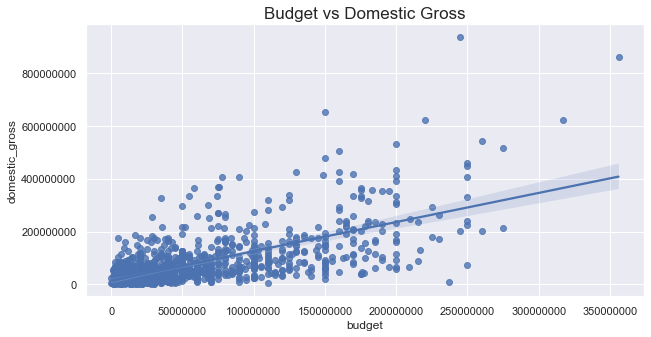

In [22]:
#budget vs domestic gross
budget=sns.regplot(x='budget',y='domestic_gross',data=movie_data);
plt.ticklabel_format(style='plain', axis='y')
budget.figure.set_size_inches(10,5)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Budget vs Domestic Gross',fontsize=17);

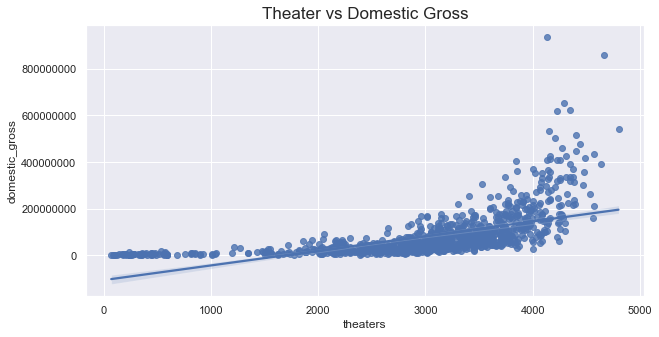

In [23]:
#theaters vs domestic gross
theater=sns.regplot(x='theaters',y='domestic_gross',data=movie_data);
plt.ticklabel_format(style='plain', axis='y')
plt.title('Theater vs Domestic Gross',fontsize=17)
theater.figure.set_size_inches(10,5)

<b><font size="4">Train/Validation/Test</font>

In [24]:
# Get Features (X) and Target (y)
X = movie_data.drop('domestic_gross', axis=1)
y = movie_data['domestic_gross']

In [25]:
# Split data into training and test sets in the 80%/20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b><font size="4">Standard-Scaling Features</font>

In [26]:
# Scale the X_train and X_test sets
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b><font size="4">Linear Regression</font>

In [27]:
lr = LinearRegression()

# Train/fit the model to train set
lr.fit(X_train, y_train)

r_squared_train=lr.score(X_train,y_train)
print("R^2 Train Set:",r_squared_train)

r_squared_test=lr.score(X_test,y_test)
print("R^2 Test Set:", r_squared_test)

R^2 Train Set: 0.5019372260113688
R^2 Test Set: 0.5285193332970891


In [28]:
model=sm.OLS(y_train,sm.add_constant(X_train))
movie_model=model.fit()
movie_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.30e-123
Time:                        22:38:23   Log-Likelihood:                -16760.
No. Observations:                 862   AIC:                         3.354e+04
Df Residuals:                     853   BIC:                         3.358e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.905e+07    2.3e+06     34.317      0.000    7.45e+07    8.36e+07
x1          3.895e+07   3.25e+06     11.990      0.000    3.26e+07    4.53e+07
x2          5.346e+05   2.47e+06      0.217      0.829   -4.31e+06    5.38e+06
x3          3.109e+07   2.95e+06     10.526      0.000    2.53e+07    3.69e+07
x4          9.329e+06   2.71e+06      3.443      0.001    4.01e+06    1.46e+07
x5          8.457e+06   2.34e+06      3.619      0.000    3.87e+06     1.3e+07
x6         -1.386e+06   2.31e+06     -0.600      0.549   -5.92e+06    3.15e+06
x7          1.989e+06   1.89e+06      1.054      0.292   -1.72e+06    5.69e+06
x8         -1.392e+06   1.48e+06     -0.943      0.346   -4.29e+06    1.51e+06
x9          3.141e+04    1.6e+06      0.020      0.984    -3.1e+06    3.16e+06
==============================================================================
Omnibus:                      553.557   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10792.768
Skew:                           2.579   Prob(JB):                         0.00
Kurtosis:                      19.550   Cond. No.                     9.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
#Try K-fold CV for validation
kf = KFold(n_splits=10, shuffle=False)
np.mean(cross_val_score(lr, X,y, cv=kf, scoring='r2'))

0.49636967673110266

In [30]:
#Create a linear regression model
lr = LinearRegression()

# Train/fit the model to train set
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the evaluation metrics
lr_r_squared = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr,squared=False)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print('R^2                   :', lr_r_squared)
print('Root Mean Square Error:', lr_rmse)
print('Mean Absolute Error   :', lr_mae)

R^2                   : 0.5285193332970891
Root Mean Square Error: 69031376.69983996
Mean Absolute Error   : 45718340.38033148


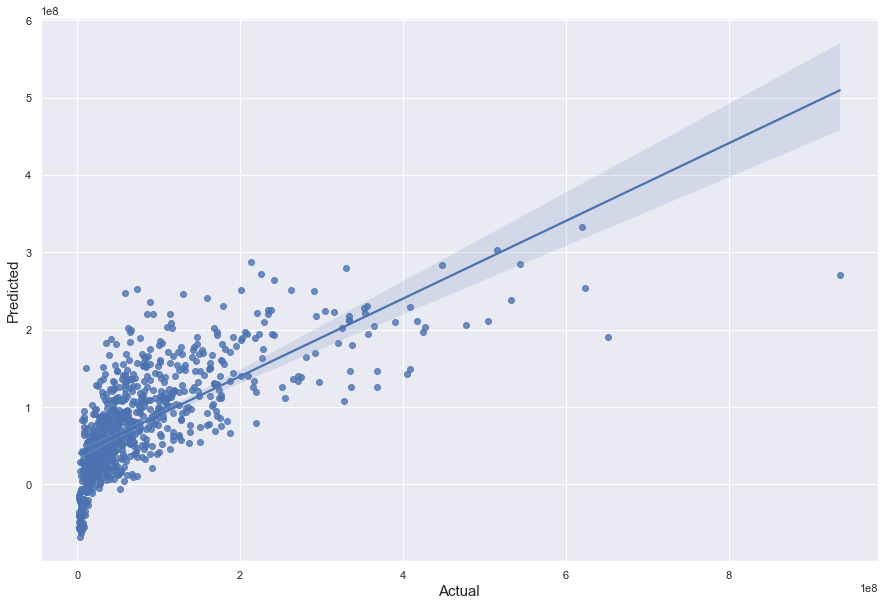

In [31]:
sns.regplot(y_train,lr.predict(X_train))
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.savefig('linear_regression_1');

<font size="2">Let's see if we can improve the scores by using polynomial features.</font>

In [32]:
poly = PolynomialFeatures(degree=4)

# Split data into training and test sets in the 80%/20% split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_poly = scaler.fit_transform(X_train)
X_test_poly = scaler.transform(X_test_poly)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test_poly)

# Train/fit the model to train set
lr.fit(X_train_poly, y_train_poly)

r_squared_train=lr.score(X_train_poly,y_train_poly)
print("R^2 Train Set:",r_squared_train)

r_squared_test=lr.score(X_test_poly,y_test_poly)
print("R^2 Test Set:", r_squared_test)

R^2 Train Set: 0.7902804789380399
R^2 Test Set: -5.320848096612574e+63


<b><font size="4">Log Transformation of Target Variable (y)</font>

In [33]:
# Get Features (X) and Target (y)
X = movie_data.drop('domestic_gross', axis=1)
y = np.log(movie_data['domestic_gross'])

# Split data into training and test sets in the 80%/20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the X_train and X_test sets
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b><font size="2">Linear Regression</font>

In [34]:
lr = LinearRegression()

# Train/fit the model to train set
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the evaluation metrics
lr_r_squared = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr,squared=False)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print('R^2                   :', lr_r_squared)
print('Root Mean Square Error:', lr_rmse)
print('Mean Absolute Error   :', lr_mae)

R^2                   : 0.7182537777497258
Root Mean Square Error: 0.5587162139921623
Mean Absolute Error   : 0.4405541937392903


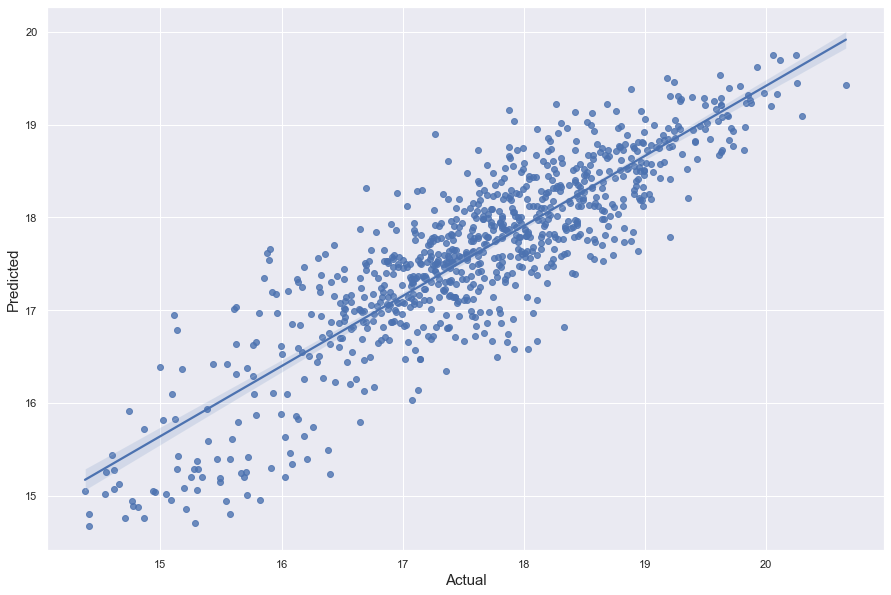

In [35]:
sns.regplot(y_train,lr.predict(X_train))
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.savefig('linear_regression_2');

<b><font size="2">Lasso Regression</font>

In [36]:
# Create a object of Lasso Regression 
lasso = Lasso(alpha=0.05)

# Train/fit the model to train set
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculate the evaluation metrics
lasso_r_squared = r2_score(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso,squared=False)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print('R^2                   :', lasso_r_squared)
print('Root Mean Square Error:', lasso_rmse)
print('Mean Absolute Error   :', lasso_mae)

R^2                   : 0.72649383914977
Root Mean Square Error: 0.5504853691481931
Mean Absolute Error   : 0.43672833047194903


<b><font size="2">Ridge Regression</font>

In [37]:
ridge = Ridge()

# Train/fit the model to train set
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)

# Calculate the evaluation metrics
ridge_r_squared = r2_score(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge,squared=False)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print('R^2                   :', ridge_r_squared)
print('Root Mean Square Error:', ridge_rmse)
print('Mean Absolute Error   :', ridge_mae)

R^2                   : 0.7181988511839084
Root Mean Square Error: 0.5587706723396849
Mean Absolute Error   : 0.44056701483886385


<b><font size="2">Random Forest Regression</font>

In [38]:
# Create a object of Random Forest Regression
rf = RandomForestRegressor()

# Train/fit the model to train set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the evaluation metrics
rf_r_squared = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf,squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print('R^2                   :', rf_r_squared)
print('Root Mean Square Error:', rf_rmse)
print('Mean Absolute Error   :', rf_mae)

R^2                   : 0.7386135103872211
Root Mean Square Error: 0.5381505545594453
Mean Absolute Error   : 0.4260022094693652


<font size="4">Try K-Fold CV for Validation</font>

In [39]:
kf = KFold(n_splits=10,shuffle=False)
lr_cv_r2=np.mean(cross_val_score(lr, X,y, cv=kf, scoring='r2'))
lasso_cv_r2=np.mean(cross_val_score(lasso, X,y, cv=kf, scoring='r2'))
ridge_cv_r2=np.mean(cross_val_score(ridge, X,y, cv=kf, scoring='r2'))
rf_cv_r2=np.mean(cross_val_score(rf, X,y, cv=kf, scoring='r2'))

In [40]:
pd.DataFrame(data={'Model':['Linear Regression', 'Lasso', 'Ridge', 'Random Forest'],
                  'R2':[lr_r_squared, lasso_r_squared, ridge_r_squared, rf_r_squared],
                  'R2 CV':[lr_cv_r2, lasso_cv_r2, ridge_cv_r2, rf_cv_r2],
                  'RMSE':[lr_rmse, lasso_rmse, ridge_rmse, rf_rmse],
                  'MAE':[lr_mae, lasso_mae, ridge_mae, rf_mae]})

,Model,R2,R2 CV,RMSE,MAE
0,Linear Regression,0.718254,0.713121,0.558716,0.440554
1,Lasso,0.726494,0.714241,0.550485,0.436728
2,Ridge,0.718199,0.713174,0.558771,0.440567
3,Random Forest,0.738614,0.718805,0.538151,0.426002


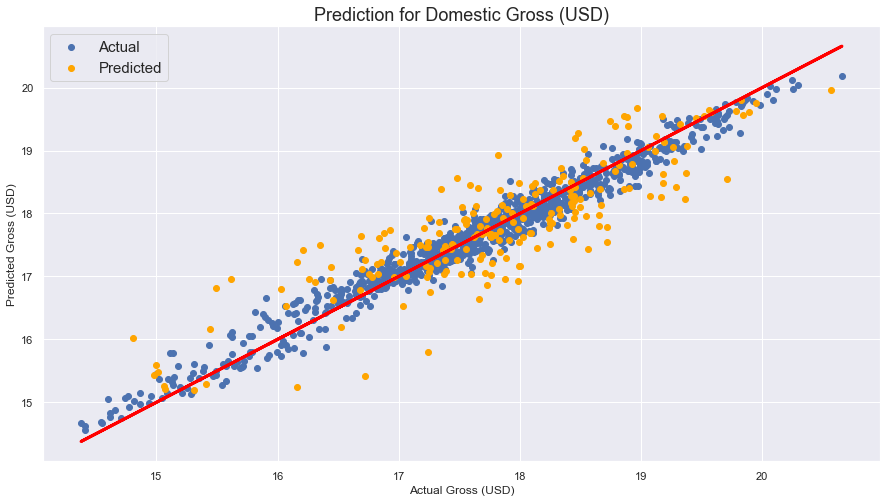

In [41]:
#Plot using random forest regression
plt.figure(figsize=(15,8))
plt.scatter(y_train, rf.predict(X_train))
plt.xlabel('Actual Gross (USD)')
plt.ylabel('Predicted Gross (USD)')
plt.title('Prediction for Domestic Gross (USD)',fontsize=18)
plt.scatter(y_test, rf.predict(X_test), color='orange')
plt.legend(('Actual','Predicted'),prop={'size': 15})
plt.plot(y_train, y_train, color='red', linewidth=3)
plt.savefig('pred scatterplot'); 